In [1]:
import pandas as pd
import numpy as np
st = pd.read_excel('MDS6212 Week 3 Stock returns.xlsx', sheet_name='data')
on = pd.read_excel('MDS6212 Week 3 Online sales.xlsx')

### Q1

In [2]:
st['date'] = st['month'].apply(lambda x: x + '-01')
st['date'] = pd.to_datetime(st['date'])
st = st.sort_values(by=['date'])

In [3]:
st['quarter'] = st['date'].dt.to_period('Q')
q_ret = st.groupby(['stkcd', 'quarter'])['retrf'].mean().rename('quarter_ret').reset_index()
numb_obs = st.groupby(['stkcd', 'quarter'])['retrf'].count().rename('obs').reset_index()
quarter_df = pd.merge(q_ret, numb_obs, on=['stkcd', 'quarter'])
quarter_df['month_ret'] = quarter_df['quarter_ret'] / 3 
quarter_df_1 = quarter_df.copy()

quarter_char_df = st.drop_duplicates(subset=['stkcd', 'quarter'], keep='last')
quarter_char_df['shift_size'] = quarter_char_df.groupby('stkcd')['size'].shift()
quarter_char_df['prev_date'] = quarter_char_df.groupby('stkcd')['date'].shift()
quarter_char_df['gap'] = quarter_char_df.apply(lambda x: (x.date - x.prev_date).days, axis=1)
quarter_char_df_1 = quarter_char_df.copy()

quarter_char_df = quarter_char_df[quarter_char_df['gap']//90==1]
quarter_char_df.loc[quarter_char_df['stkcd']==300197]
quarter_df = pd.merge(quarter_char_df, quarter_df, on=['stkcd', 'quarter'])
quarter_df

C:\Users\10445\AppData\Local\Temp\ipykernel_9672\470111519.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_char_df['shift_size'] = quarter_char_df.groupby('stkcd')['size'].shift()
C:\Users\10445\AppData\Local\Temp\ipykernel_9672\470111519.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_char_df['prev_date'] = quarter_char_df.groupby('stkcd')['date'].shift()
C:\Users\10445\AppData\Local\Temp\ipykernel_9672\470111519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy

,stkcd,stknme,conme,month,retrf,mktrf,smb,hml,umd,size,...,instown,mv,date,quarter,shift_size,prev_date,gap,quarter_ret,obs,month_ret
0,600267,海正药业,浙江海正药业股份有限公司,2012-09,12.6869,1.9833,-1.8884,-1.7613,-0.2512,23.29704,...,29.51330,14678114304,2012-09-01,2012Q3,23.53708,2012-06-01,92.0,-3.176933,3,-1.058978
1,2091,江苏国泰,江苏国泰国际集团股份有限公司,2012-09,-3.4119,1.9833,-1.8884,-1.7613,-0.2512,22.15176,...,4.23250,3600535808,2012-09-01,2012Q3,22.24164,2012-06-01,92.0,-7.042733,3,-2.347578
2,2065,东华软件,东华软件股份公司,2012-09,0.3216,1.9833,-1.8884,-1.7613,-0.2512,23.11896,...,25.65880,9939323904,2012-09-01,2012Q3,23.18356,2012-06-01,92.0,1.463467,3,0.487822
3,2529,海源复材,福建海源复合材料科技股份有限公司,2012-09,5.0232,1.9833,-1.8884,-1.7613,-0.2512,21.22864,...,2.05980,779533568,2012-09-01,2012Q3,21.36638,2012-06-01,92.0,-4.899033,3,-1.633011
4,300205,天喻信息,武汉天喻信息产业股份有限公司,2012-09,4.9936,1.9833,-1.8884,-1.7613,-0.2512,21.18876,...,1.46580,644941760,2012-09-01,2012Q3,21.34362,2012-06-01,92.0,1.464800,3,0.488267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25356,300582,英飞特,英飞特电子(杭州)股份有限公司,2019-12,17.4007,6.2083,1.2581,-0.9661,1.0033,21.55478,...,0.11695,1190539136,2019-12-01,2019Q4,21.81648,2019-09-01,91.0,4.999700,3,1.666567
25357,300051,三五互联,厦门三五互联科技股份有限公司,2019-12,8.2529,6.2083,1.2581,-0.9661,1.0033,21.65075,...,2.15860,1403355392,2019-12-01,2019Q4,21.67269,2019-09-01,91.0,-0.113833,3,-0.037944
25358,2119,康强电子,宁波康强电子股份有限公司,2019-12,13.7920,6.2083,1.2581,-0.9661,1.0033,22.26170,...,0.36630,4964972544,2019-12-01,2019Q4,22.01294,2019-09-01,91.0,-1.375900,3,-0.458633
25359,600512,腾达建设,腾达建设集团股份有限公司,2019-12,2.4306,6.2083,1.2581,-0.9661,1.0033,22.23990,...,2.36235,4221103360,2019-12-01,2019Q4,22.21143,2019-09-01,91.0,1.982667,3,0.660889


In [24]:
temp = quarter_df[['stkcd', 'quarter', 'shift_size', 'month_ret']]
grouped_quarter = temp.groupby(['quarter'])
for i in range(1, 5):
    temp[f'{i}_cut'] = grouped_quarter['shift_size'].transform(lambda x: x.quantile(0.2 * i))

conditions = [temp['shift_size'] <= temp['1_cut'], \
              (temp['shift_size'] > temp['1_cut']) & (temp['shift_size'] <= temp['2_cut']),\
              (temp['shift_size'] > temp['2_cut']) & (temp['shift_size'] <= temp['3_cut']),\
              (temp['shift_size'] > temp['3_cut']) & (temp['shift_size'] <= temp['4_cut']),\
              temp['shift_size'] > temp['4_cut']]
choices = range(1, 6)
temp['size_group'] = np.select(conditions, choices, default=np.nan)
temp

C:\Users\10445\AppData\Local\Temp\ipykernel_9672\4164427244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[f'{i}_cut'] = grouped_quarter['shift_size'].transform(lambda x: x.quantile(0.2 * i))
C:\Users\10445\AppData\Local\Temp\ipykernel_9672\4164427244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[f'{i}_cut'] = grouped_quarter['shift_size'].transform(lambda x: x.quantile(0.2 * i))
C:\Users\10445\AppData\Local\Temp\ipykernel_9672\4164427244.py:4: SettingWithCopyWarning: 
A value is trying

,stkcd,quarter,shift_size,month_ret,1_cut,2_cut,3_cut,4_cut,size_group
0,600267,2012Q3,23.53708,-1.058978,21.33144,21.699320,22.056440,22.672214,5.0
1,2091,2012Q3,22.24164,-2.347578,21.33144,21.699320,22.056440,22.672214,4.0
2,2065,2012Q3,23.18356,0.487822,21.33144,21.699320,22.056440,22.672214,5.0
3,2529,2012Q3,21.36638,-1.633011,21.33144,21.699320,22.056440,22.672214,2.0
4,300205,2012Q3,21.34362,0.488267,21.33144,21.699320,22.056440,22.672214,2.0
...,...,...,...,...,...,...,...,...,...
25356,300582,2019Q4,21.81648,1.666567,21.76905,22.175492,22.571832,23.169350,2.0
25357,300051,2019Q4,21.67269,-0.037944,21.76905,22.175492,22.571832,23.169350,1.0
25358,2119,2019Q4,22.01294,-0.458633,21.76905,22.175492,22.571832,23.169350,2.0
25359,600512,2019Q4,22.21143,0.660889,21.76905,22.175492,22.571832,23.169350,3.0


In [25]:
temp.loc[temp['quarter'] == temp['quarter'].iloc[-1], 'size_group'].value_counts().sort_index()

size_group
1.0    349
2.0    348
3.0    349
4.0    348
5.0    349
Name: count, dtype: int64

<Axes: title={'center': ' Monthly Return by Size'}, xlabel='quarter', ylabel='STOCK Return'>

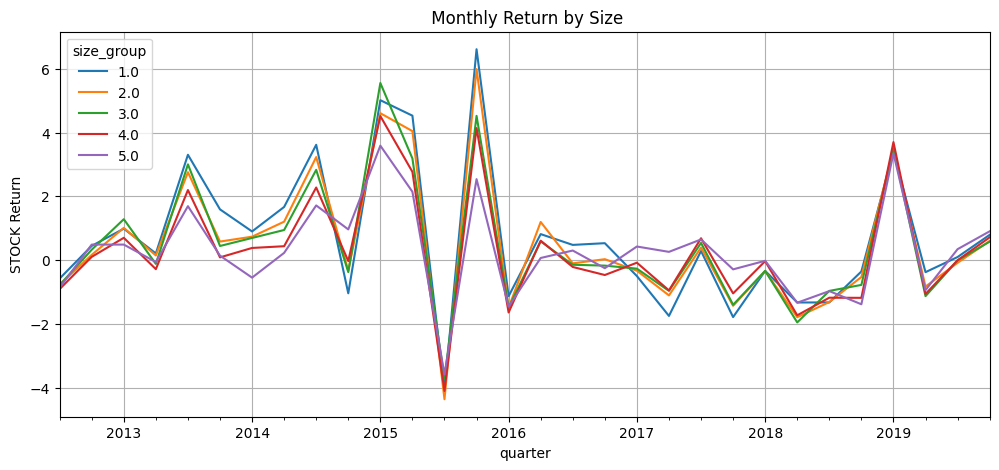

In [26]:
import matplotlib.pyplot as plt
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()
    
port = temp.groupby(['quarter', 'size_group']).apply(wavg, 'month_ret', 'shift_size').unstack()
time = port.index.values
port.plot(figsize=(12, 5), ylabel = 'STOCK Return', title = ' Monthly Return by Size', grid = True)

In [27]:
port

size_group,1.0,2.0,3.0,4.0,5.0
quarter,,,,,
2012Q3,-0.576241,-0.765767,-0.778633,-0.906373,-0.862907
2012Q4,0.447403,0.165826,0.328239,0.103033,0.488447
2013Q1,0.987048,1.013331,1.284018,0.700786,0.488258
2013Q2,0.210858,0.148054,-0.117715,-0.282253,-0.057807
2013Q3,3.304369,2.757581,3.003748,2.198187,1.692512
2013Q4,1.592600,0.582877,0.444439,0.087274,0.141249
2014Q1,0.899936,0.735871,0.695871,0.382422,-0.547914
2014Q2,1.668447,1.206929,0.945510,0.437030,0.228491
2014Q3,3.617130,3.232480,2.831945,2.277950,1.715638


<Axes: title={'center': 'Monthly Return by Size'}, xlabel='quarter', ylabel='Stock Return'>

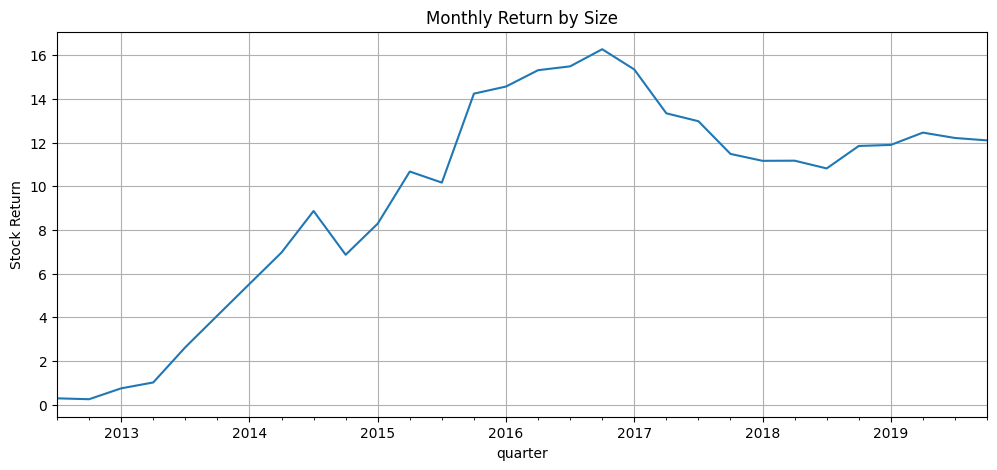

In [7]:
pd.DataFrame(port.mean()).rename(columns={0:'mean_retrf'})
port['smb'] = port[1] - port[5]
port['cumu_smb'] = port['smb'].cumsum()
port['cumu_smb'].plot(figsize=(12, 5), ylabel='Stock Return', title='Monthly Return by Size', grid=True)

### Q2

C:\Users\10445\AppData\Local\Temp\ipykernel_9672\3104193505.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[f'{i}_cut'] = grouped_quarter['shift_instown'].transform(lambda x: x.quantile(0.2 * i))
C:\Users\10445\AppData\Local\Temp\ipykernel_9672\3104193505.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[f'{i}_cut'] = grouped_quarter['shift_instown'].transform(lambda x: x.quantile(0.2 * i))
C:\Users\10445\AppData\Local\Temp\ipykernel_9672\3104193505.py:10: SettingWithCopyWarning: 
A value 

<Axes: title={'center': 'Monthly Return by Institute Ownership'}, xlabel='quarter', ylabel='Stock Return'>

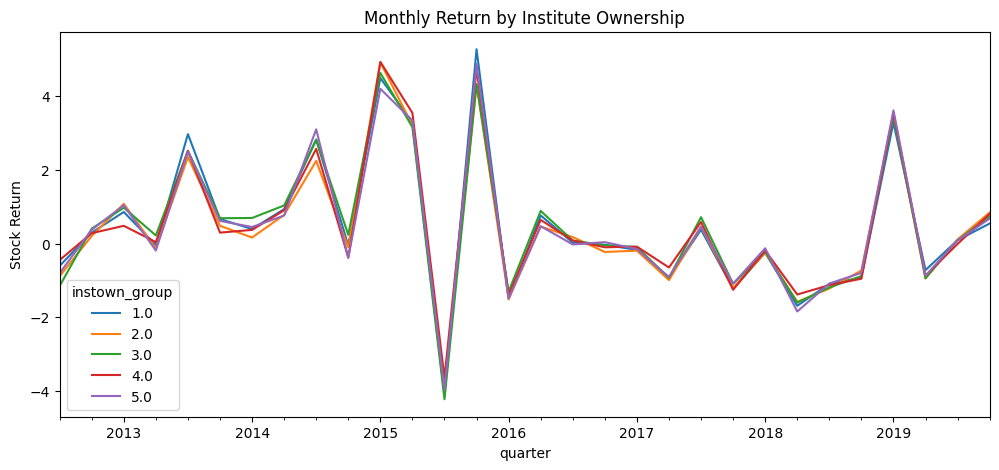

In [28]:
quarter_char_df = quarter_char_df_1
quarter_char_df['shift_instown'] = quarter_char_df.groupby(['quarter'])['instown'].shift()
quarter_char_df = quarter_char_df[quarter_char_df['gap'] // 90 == 1]
quarter_df = quarter_df_1
quarter_df = pd.merge(quarter_char_df, quarter_df, on=['stkcd', 'quarter'])

temp = quarter_df[['stkcd', 'quarter', 'shift_size', 'shift_instown', 'month_ret']]
grouped_quarter = temp.groupby(['quarter'])
for i in range(1, 5):
    temp[f'{i}_cut'] = grouped_quarter['shift_instown'].transform(lambda x: x.quantile(0.2 * i))

conditions = [temp['shift_instown'] <= temp['1_cut'], \
              (temp['shift_instown'] > temp['1_cut']) & (temp['shift_instown'] <= temp['2_cut']),\
              (temp['shift_instown'] > temp['2_cut']) & (temp['shift_instown'] <= temp['3_cut']),\
              (temp['shift_instown'] > temp['3_cut']) & (temp['shift_instown'] <= temp['4_cut']),\
              temp['shift_instown'] > temp['4_cut']]
choices = range(1, 6)
temp['instown_group'] = np.select(conditions, choices, default=np.nan)
port = temp.groupby(['quarter', 'instown_group']).apply(wavg, 'month_ret', 'shift_size').unstack()
port.plot(figsize = (12, 5), ylabel='Stock Return', title='Monthly Return by Institute Ownership')

In [29]:
pd.DataFrame(port.mean()).rename(columns={0: 'mean_retrf'})

,mean_retrf
instown_group,
1.0,0.457840
2.0,0.382082
3.0,0.465548
4.0,0.460553
5.0,0.428475


<Axes: title={'center': 'Monthly Return by Size'}, xlabel='quarter', ylabel='Stock Return'>

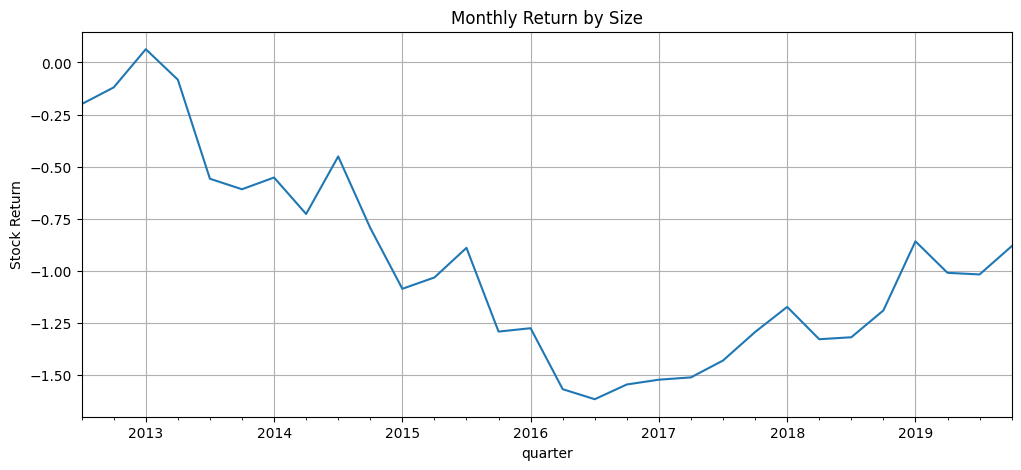

In [30]:
port['hml_inst'] = port[5] - port[1]
port['cumu_hml_inst'] = port['hml_inst'].cumsum()
port['cumu_hml_inst'].plot(figsize=(12, 5), ylabel='Stock Return', title='Monthly Return by Size', grid=True)

### Q3

In [31]:
from linearmodels.panel import PanelOLS
import seaborn as sns
st['month'] = pd.to_datetime(st['month'])
st.set_index(['stkcd', 'month'], inplace=True)
x_var = ['size', 'bm', 'return12', 'roa', 'lev', 'ppe', 'intang', 'numanalyst', 'instown']
y_var = 'retrf'
reg = PanelOLS(st[y_var], st[x_var], entity_effects=True, time_effects=True)
reg_clu = reg.fit(cov_type='clustered')
reg_clu

Dep. Variable:,retrf,R-squared:,0.0123
Estimator:,PanelOLS,R-squared (Between):,-1202.4
No. Observations:,87432,R-squared (Within):,0.0111
Date:,"Mon, Oct 09 2023",R-squared (Overall):,-38.009
Time:,17:54:14,Log-likelihood,-3.277e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,117.96
Entities:,2035,P-value,0.0000
Avg Obs:,42.964,Distribution:,"F(9,85296)"
Min Obs:,3.0000,,
Max Obs:,93.000,F-statistic (robust):,95.547
